In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
agents = ['q_learning', 'sarsa']
policies = ['epsilon', 'softmax']
num_types = 5

In [6]:
def moving_avg(arr, window_size=100):
    return np.convolve(arr, np.ones(window_size)/window_size, mode='valid')

In [7]:
data_all = {}

for agent in agents:
    for policy in policies:
        df = pd.DataFrame()
        for type in range(num_types):
            file_name = f'results/{agent}_{policy}_rewards_{type}.txt'
            data = pd.read_csv(file_name, header=None)
            df[type] = moving_avg(np.array(data).reshape(-1,))
        data_all[f'{agent}_{policy}'] = df    

In [8]:
def plot(data_all,agent,policy,color='blue'):
    keys = list(data_all.keys())
    to_plot = data_all[f'{agent}_{policy}']
    mean_to_plot = to_plot.mean(axis = 1)
    std_to_plot = to_plot.std(axis = 1)

    # fig,ax = plt.figure(figsize=(10,6))
    plt.plot(mean_to_plot, color=color, label=f'Mean_{policy}_{agent}')
    plt.fill_between(np.arange(len(mean_to_plot)), mean_to_plot - std_to_plot, mean_to_plot + std_to_plot, color=color, alpha=0.3)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.title(f'{keys[0].replace("_", "-").upper()}')
    # plt.show()
    # plt.close()

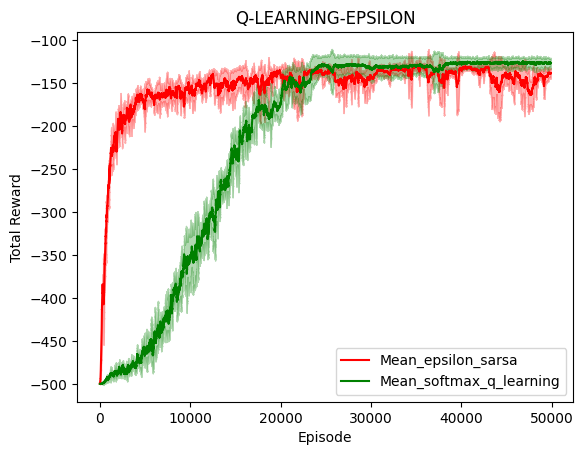

In [9]:
# plot(data_all, 'q_learning', 'epsilon','blue')
plot(data_all,'sarsa', 'epsilon','red')
plot(data_all, 'q_learning','softmax','green')
# plot(data_all,'sarsa','softmax','yellow')
plt.show()